In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                 y_train_full)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [7]:
X_train.shape[1:]

(8,)

In [11]:
model1 = keras.models.Sequential(
    [
        keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ]
)

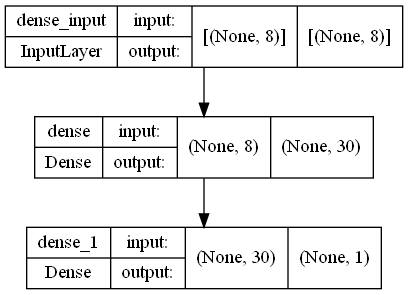

In [12]:
keras.utils.plot_model(model,show_shapes=True)

In [13]:
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             loss='mean_squared_error',
             metrics=['mse'])

In [14]:
history = model1.fit(X_train, y_train,
                   epochs=30,
                   batch_size=32,
                   validation_data=(X_val,y_val))

Epoch 1/30
387/387 [==============================] - 0s 780us/step - loss: 1.8368 - mse: 1.8368 - val_loss: 0.9121 - val_mse: 0.9121
Epoch 2/30
387/387 [==============================] - 0s 589us/step - loss: 0.8236 - mse: 0.8236 - val_loss: 0.6556 - val_mse: 0.6556
Epoch 3/30
387/387 [==============================] - 0s 581us/step - loss: 0.6761 - mse: 0.6761 - val_loss: 0.6048 - val_mse: 0.6048
Epoch 4/30
387/387 [==============================] - 0s 532us/step - loss: 0.6361 - mse: 0.6361 - val_loss: 0.5681 - val_mse: 0.5681
Epoch 5/30
387/387 [==============================] - 0s 574us/step - loss: 0.6087 - mse: 0.6087 - val_loss: 0.5431 - val_mse: 0.5431
Epoch 6/30
387/387 [==============================] - 0s 574us/step - loss: 0.5869 - mse: 0.5869 - val_loss: 0.5231 - val_mse: 0.5231
Epoch 7/30
387/387 [==============================] - 0s 581us/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.5060 - val_mse: 0.5060
Epoch 8/30
387/387 [==============================] - 0s 579us

In [15]:
model1.evaluate(X_test,y_test)

129/129 [==============================] - 0s 428us/step - loss: 0.4283 - mse: 0.4283


[0.4282624125480652, 0.4282624125480652]

In [16]:
y_pred = model.predict(X_test[:3])

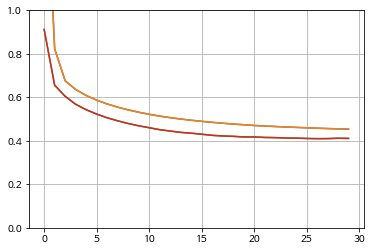

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

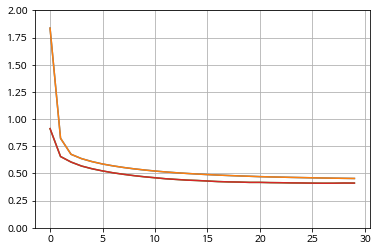

In [18]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [19]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
output = keras.layers.Dense(1)(hidden2)
model1 = keras.models.Model(inputs=[input_],outputs=[output])

In [20]:
input_A = keras.layers.Input(shape=[5],name='wide')
input_B = keras.layers.Input(shape=[6],name='deep')
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='main_out')(concat)
aux_output = keras.layers.Dense(1,name='aux_out')(hidden2)
model2 = keras.models.Model(inputs=[input_A, input_B],outputs=[output,aux_output])

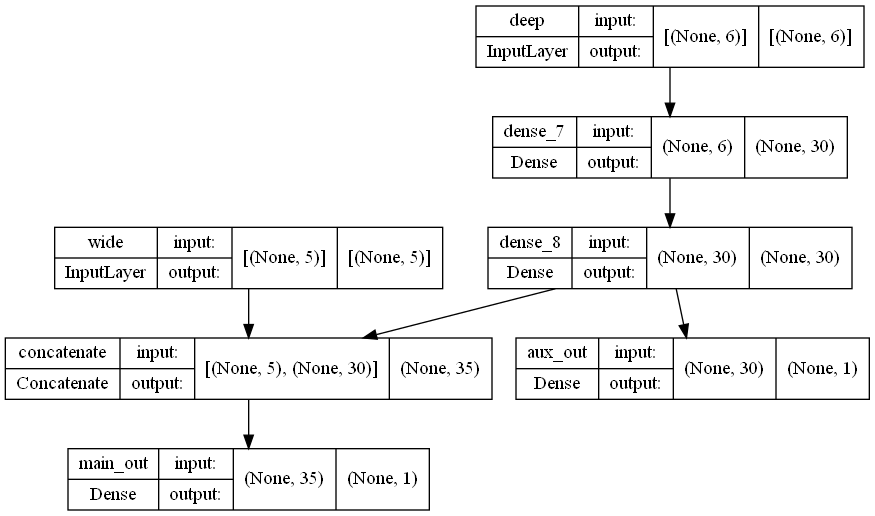

In [21]:
keras.utils.plot_model(model2,show_shapes=True)

In [22]:
model2.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-3),
               loss_weights = [0.9,0.1],
               loss = ['mse','mse'])

In [23]:
X_train_A = X_train[:,:5]
X_train_B = X_train[:,2:]
X_val_A = X_val[:,:5]
X_val_B = X_val[:,2:]

In [24]:
history = model2.fit([X_train_A, X_train_B], 
                     [y_train, y_train],
                     epochs=30,
                     validation_data=([X_val_A,X_val_B],[y_val,y_val]))

Epoch 1/30
387/387 [==============================] - 1s 890us/step - loss: 2.8476 - main_out_loss: 2.6561 - aux_out_loss: 4.5709 - val_loss: 1.4874 - val_main_out_loss: 1.2394 - val_aux_out_loss: 3.7194
Epoch 2/30
387/387 [==============================] - 0s 705us/step - loss: 1.1827 - main_out_loss: 0.9689 - aux_out_loss: 3.1073 - val_loss: 1.0191 - val_main_out_loss: 0.8394 - val_aux_out_loss: 2.6361
Epoch 3/30
387/387 [==============================] - 0s 704us/step - loss: 0.9207 - main_out_loss: 0.7655 - aux_out_loss: 2.3175 - val_loss: 0.8848 - val_main_out_loss: 0.7523 - val_aux_out_loss: 2.0766
Epoch 4/30
387/387 [==============================] - 0s 697us/step - loss: 0.8301 - main_out_loss: 0.7089 - aux_out_loss: 1.9206 - val_loss: 0.8139 - val_main_out_loss: 0.7054 - val_aux_out_loss: 1.7904
Epoch 5/30
387/387 [==============================] - 0s 692us/step - loss: 0.7781 - main_out_loss: 0.6736 - aux_out_loss: 1.7186 - val_loss: 0.7671 - val_main_out_loss: 0.6698 - val_a

In [25]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[8])
hidden_a1 = keras.layers.Dense(60,activation='tanh')(input_A)
hidden_a2 = keras.layers.Dense(50,activation='relu')(hidden_a1)
hidden_a3 = keras.layers.Dense(40,activation='relu')(hidden_a2)
hidden_a4 = keras.layers.Dense(30,activation='relu')(hidden_a3)
hidden_a5 = keras.layers.Dense(20,activation='relu')(hidden_a4)
out_a = keras.layers.Dense(10,activation='relu')(hidden_a5)
hidden_b1 = keras.layers.Dense(200,activation='relu')(input_B)
out_b = keras.layers.Dense(100,activation='relu')(hidden_b1)
concat = keras.layers.concatenate([out_a,out_b])
main_out = keras.layers.Dense(1,activation='linear')(concat)
model3 = keras.models.Model(inputs=[input_A, input_B],outputs=[main_out])

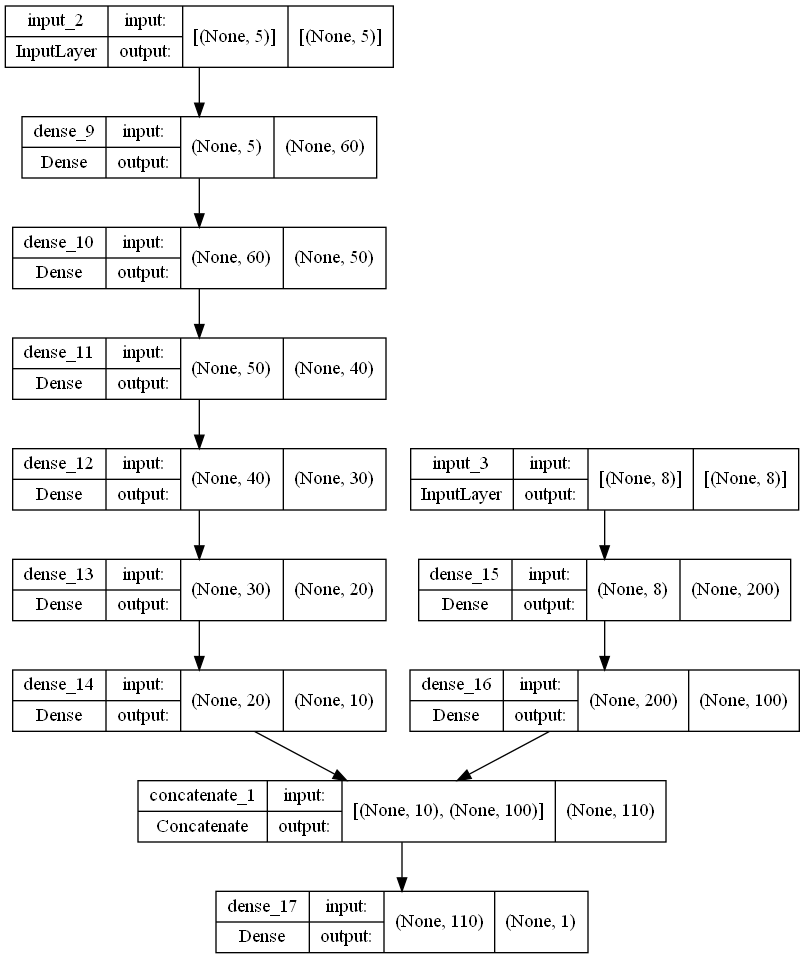

In [26]:
keras.utils.plot_model(model3,show_shapes=True)

In [27]:
model3.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss='mean_squared_error',
              metrics=['mse'])

In [28]:
history = model3.fit([X_train[:,:5],X_train],
          y_train,
          epochs=20,
          batch_size=32,
          validation_data=([X_val[:,:5],X_val],y_val))

Epoch 1/20
387/387 [==============================] - 1s 1ms/step - loss: 0.6158 - mse: 0.6158 - val_loss: 1.2172 - val_mse: 1.2172
Epoch 2/20
387/387 [==============================] - 0s 851us/step - loss: 0.3895 - mse: 0.3895 - val_loss: 3.4612 - val_mse: 3.4612
Epoch 3/20
387/387 [==============================] - 0s 858us/step - loss: 0.3725 - mse: 0.3725 - val_loss: 5.1001 - val_mse: 5.1001
Epoch 4/20
387/387 [==============================] - 0s 826us/step - loss: 0.3804 - mse: 0.3804 - val_loss: 7.1889 - val_mse: 7.1889
Epoch 5/20
387/387 [==============================] - 0s 853us/step - loss: 0.3603 - mse: 0.3603 - val_loss: 9.3395 - val_mse: 9.3395
Epoch 6/20
387/387 [==============================] - 0s 827us/step - loss: 0.3217 - mse: 0.3217 - val_loss: 9.7392 - val_mse: 9.7392
Epoch 7/20
387/387 [==============================] - 0s 850us/step - loss: 0.3244 - mse: 0.3244 - val_loss: 11.1627 - val_mse: 11.1627
Epoch 8/20
387/387 [==============================] - 0s 837us